In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [63]:
# Точное решение
def y_exact(x):
    return x**3 * (math.log(x) + 1)

In [64]:
# Правая часть уравнения y' = f(x, y)
def y_pro(x, y):
    return (x**3 + 3*y)/x

In [65]:
# Метод Эйлера
def yi_eller(yi, h, xi):
    return yi + h * y_pro(xi, yi)

In [66]:
# Уточнённый метод Эйлера (прогноз-коррекция)
def yi_eller_ut(yi, h, xi):
    f1 = y_pro(xi, yi)
    f2 = y_pro(xi + h, yi + h * f1)
    return yi + (h/2) * (f1 + f2)

In [67]:
# Метод Рунге-Кутты 4-го порядка
def yi_rungge_kutta(yi, h, xi):
    k1 = y_pro(xi, yi)
    k2 = y_pro(xi + h/2, yi + h/2 * k1)
    k3 = y_pro(xi + h/2, yi + h/2 * k2)
    k4 = y_pro(xi + h, yi + h * k3)
    return yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

In [81]:
#Уточнённый метод Эйлера с итерацией
def yi_euler_iterative(yi, h, xi, eps=1e-4, max_iter=100):
    f1 = y_pro(xi, yi)
    y_pred = yi + h * f1  # прогноз

    for _ in range(max_iter):
        f2 = y_pro(xi + h, y_pred)
        y_corr = yi + (h / 2) * (f1 + f2)
        if abs(y_corr - y_pred) < eps:
            break
        y_pred = y_corr

    return y_corr

In [104]:
#Метод Милна
def yi_milne(yi_list, xi_list, h):
    # Предиктор (Milne’s Predictor)
    f0 = y_pro(xi_list[0], yi_list[0])  # y_{i-3}
    f1 = y_pro(xi_list[1], yi_list[1])  # y_{i-2}
    f2 = y_pro(xi_list[2], yi_list[2])  # y_{i-1}
    f3 = y_pro(xi_list[3], yi_list[3])  # y_{i}

    y_pred = yi_list[0] + (4 * h / 3) * (2*f1 - f2 + 2*f3)
    x_next = xi_list[3] + h
    f_pred = y_pro(x_next, y_pred)

    # Корректор (Milne’s Corrector)
    y_corr = yi_list[2] + (h / 3) * (f2 + 4*f3 + f_pred)

    return y_corr

In [105]:
# Генератор диапазона значений
def frange(start, stop, step):
    x = start
    while x <= stop + 1e-9:
        yield round(x, 10)
        x += step

In [106]:
# Начальные условия
x0 = 1
y0 = 1
h = 0.03

# Списки значений
xi_p = []
y_exact_p = []
y_euler = []
y_euler_u = []
y_rk = []
y_euler_i = []
y_milne = []
milne_ready = []

# Начальные значения
ye = y0
yeu = y0
yrk = y0
yei = y0

# Расчёты
for xi in frange(x0, 2, h):
    xi_p.append(xi)
    y_exact_p.append(y_exact(xi))
    y_euler.append(ye)
    y_euler_u.append(yeu)
    y_rk.append(yrk)
    y_euler_i.append(yei)

    # Метод Милна:
    if len(milne_ready) < 4:
        milne_ready.append(yrk)         # используем Рунге-Кутту для инициализации
        y_milne.append(yrk)
    else:
        last_4_y = y_milne[-4:]
        last_4_x = xi_p[len(y_milne)-4:len(y_milne)]
        y_next = yi_milne(last_4_y, last_4_x, h)
        y_milne.append(y_next)

    # Следующие значения
    ye = yi_eller(ye, h, xi)
    yeu = yi_eller_ut(yeu, h, xi)
    yrk = yi_rungge_kutta(yrk, h, xi)
    yei = yi_euler_iterative(yei, h, xi)

print(f"{'x':<6} {'Точное y':<12} {'Эйлер':<12} {'Уточн. Эйлер':<15} {'Рунге-Кутта':<15} {'Эйлер итерац.':<15} {'Милн':<12}")
for x, y_ex, y_el, y_eu, y_rk4, y_eit, y_m in zip(xi_p, y_exact_p, y_euler, y_euler_u, y_rk, y_euler_i, y_milne):
    print(f"{x:<6.2f} {y_ex:<12.6f} {y_el:<12.6f} {y_eu:<15.6f} {y_rk4:<15.6f} {y_eit:<15.6f} {y_m:<12.6f}")

x      Точное y     Эйлер        Уточн. Эйлер    Рунге-Кутта     Эйлер итерац.   Милн        
1.00   1.000000     1.000000     1.000000        1.000000        1.000000        1.000000    
1.03   1.125027     1.120000     1.124846        1.125027        1.125066        1.125027    
1.06   1.260415     1.249691     1.260033        1.260415        1.260499        1.260415    
1.09   1.406632     1.389505     1.406029        1.406631        1.406763        1.406631    
1.12   1.564147     1.539878     1.563302        1.564146        1.564330        1.564146    
1.15   1.733435     1.701250     1.732328        1.733435        1.733675        1.733435    
1.18   1.914978     1.874066     1.913585        1.914977        1.915278        1.914977    
1.21   2.109257     2.058775     2.107556        2.109256        2.109623        2.109256    
1.24   2.316761     2.255830     2.314728        2.316760        2.317197        2.316760    
1.27   2.537981     2.465688     2.535593        2.537980   

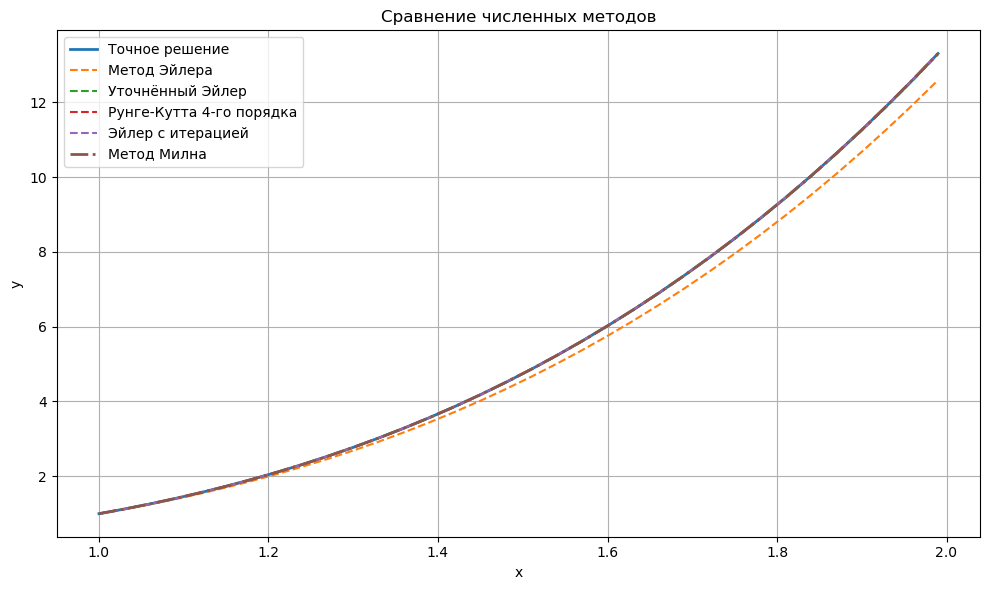

In [107]:
#Построение графиков значений
plt.figure(figsize=(10, 6))
plt.plot(xi_p, y_exact_p, label='Точное решение', linewidth=2)
plt.plot(xi_p, y_euler, label='Метод Эйлера', linestyle='--')
plt.plot(xi_p, y_euler_u, label='Уточнённый Эйлер', linestyle='--')
plt.plot(xi_p, y_rk, label='Рунге-Кутта 4-го порядка', linestyle='--')
plt.plot(xi_p, y_euler_i, label='Эйлер с итерацией', linestyle='--')
plt.plot(xi_p, y_milne, label='Метод Милна', linestyle='-.', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение численных методов')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


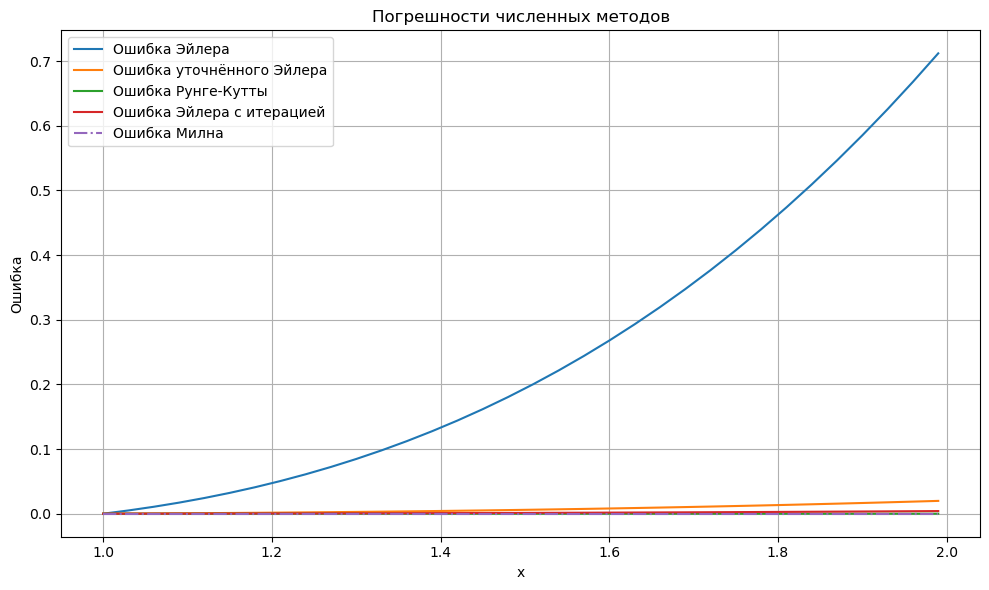

In [108]:
#График ошибок
plt.figure(figsize=(10, 6))
plt.plot(xi_p, np.abs(np.subtract(y_exact_p, y_euler)), label='Ошибка Эйлера')
plt.plot(xi_p, np.abs(np.subtract(y_exact_p, y_euler_u)), label='Ошибка уточнённого Эйлера')
plt.plot(xi_p, np.abs(np.subtract(y_exact_p, y_rk)), label='Ошибка Рунге-Кутты')
plt.plot(xi_p, np.abs(np.subtract(y_exact_p, y_euler_i)), label='Ошибка Эйлера с итерацией')
plt.plot(xi_p, np.abs(np.subtract(y_exact_p, y_milne)), label='Ошибка Милна', linestyle='-.')

plt.xlabel('x')
plt.ylabel('Ошибка')
plt.title('Погрешности численных методов')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
